# Computations and Figures for a Department of Statistics Colloquim at Purdue University
talk presented on Friday, March 3, 2023

### Import the necessary packages and set up plotting routines

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qmcpy as qp
import time  #timing routines
import warnings  #to suppress warnings when needed
import pickle  #write output to a file and load it back in
from copy import deepcopy

plt.rc('font', size=16)  #set defaults so that the plots are readable
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=16)

#a helpful plotting method to show increasing numbers of points
def plot_successive_points(distrib,ld_name,first_n=64,n_cols=1,
                           pt_clr=['tab:blue', 'tab:green', 'k', 'tab:cyan', 'tab:purple', 'tab:orange'],
                           xlim=[0,1],ylim=[0,1]):
  fig,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(5*n_cols,5.5))
  if n_cols==1: ax = [ax]
  last_n = first_n*(2**n_cols)
  points = distrib.gen_samples(n=last_n)
  for i in range(n_cols):
    n = first_n
    nstart = 0
    for j in range(i+1):
      n = first_n*(2**j)
      ax[i].scatter(points[nstart:n,0],points[nstart:n,1],color=pt_clr[j])
      nstart = n
    ax[i].set_title('n = %d'%n)
    ax[i].set_xlim(xlim); ax[i].set_xticks(xlim); ax[i].set_xlabel('$x_{i,1}$')
    ax[i].set_ylim(ylim); ax[i].set_yticks(ylim); ax[i].set_ylabel('$x_{i,2}$')
    ax[i].set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
  fig.suptitle('%s Points'%ld_name, y=0.87)
  return fig

print('QMCPy Version',qp.__version__)

#plt.style.use('../qmcpy.mplstyle')
figpath = '/Users/fredhickernell/SoftwareRepositories/Purdue-2023-March-Talk/figures/' #this path sends the figures to my directory

QMCPy Version 1.3.2


## Here are some plots of IID and Low Discrepancy (LD) Points
### Lattice points first

[[0.08355382 0.55610512 0.54809233 0.1276902  0.07777892]
 [0.58355382 0.05610512 0.04809233 0.6276902  0.57777892]
 [0.33355382 0.30610512 0.29809233 0.3776902  0.32777892]
 [0.83355382 0.80610512 0.79809233 0.8776902  0.82777892]
 [0.20855382 0.93110512 0.92309233 0.2526902  0.20277892]
 [0.70855382 0.43110512 0.42309233 0.7526902  0.70277892]
 [0.45855382 0.68110512 0.67309233 0.5026902  0.45277892]
 [0.95855382 0.18110512 0.17309233 0.0026902  0.95277892]
 [0.14605382 0.24360512 0.73559233 0.1901902  0.64027892]
 [0.64605382 0.74360512 0.23559233 0.6901902  0.14027892]
 [0.39605382 0.99360512 0.48559233 0.4401902  0.89027892]
 [0.89605382 0.49360512 0.98559233 0.9401902  0.39027892]
 [0.27105382 0.61860512 0.11059233 0.3151902  0.76527892]
 [0.77105382 0.11860512 0.61059233 0.8151902  0.26527892]
 [0.52105382 0.36860512 0.86059233 0.5651902  0.01527892]
 [0.02105382 0.86860512 0.36059233 0.0651902  0.51527892]
 [0.11480382 0.89985512 0.64184233 0.1589402  0.85902892]
 [0.61480382 0

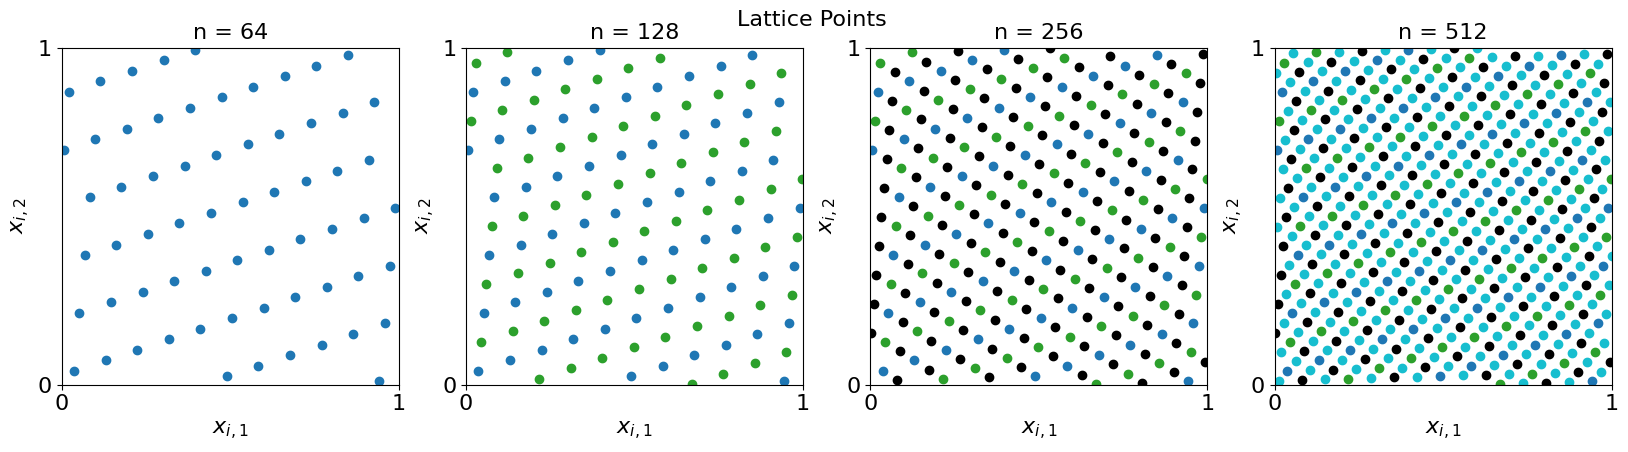

In [2]:
d = 5 #dimension
n = 64 #number of points
ld = qp.Lattice(d) #define the generator
xpts = ld.gen_samples(n) #generate points
print(xpts)
fig = plot_successive_points(ld,'Lattice',first_n=n,n_cols=4)
fig.savefig(figpath+'latticepts.eps',format='eps')

### Next Sobol' points

[[5.53100400e-01 2.94947897e-01 3.59930744e-01 5.40765458e-01
  2.70422327e-02]
 [4.86146295e-01 5.99071752e-01 7.72504098e-01 2.29718041e-01
  7.82349966e-01]
 [9.55867819e-01 7.73504402e-01 5.19040372e-01 4.31743989e-01
  4.64567333e-01]
 [2.07544176e-02 8.14372799e-02 1.14157422e-01 8.67791295e-01
  7.19875901e-01]
 [6.78270531e-01 7.42306838e-01 2.31231939e-01 6.82289070e-01
  1.30637337e-01]
 [3.60363644e-01 4.25211108e-01 6.36058563e-01 1.17357779e-01
  9.36849226e-01]
 [8.30186786e-01 2.01202683e-01 8.89796944e-01 2.90086975e-01
  3.18125594e-01]
 [1.46071825e-01 8.80362773e-01 4.77279917e-01 9.80017901e-01
  6.24336648e-01]
 [5.81299833e-01 9.65088465e-01 8.46778986e-01 7.66279455e-01
  9.75021983e-01]
 [3.95324311e-01 1.47666521e-01 2.54398240e-01 4.55256714e-01
  2.15807045e-01]
 [9.29507070e-01 4.78849373e-01 9.34501179e-04 1.27986856e-01
  5.37518827e-01]
 [1.09737718e-01 6.57359117e-01 6.01005651e-01 5.64009247e-01
  2.78304962e-01]
 [7.06616345e-01 1.01079398e-02 7.492817

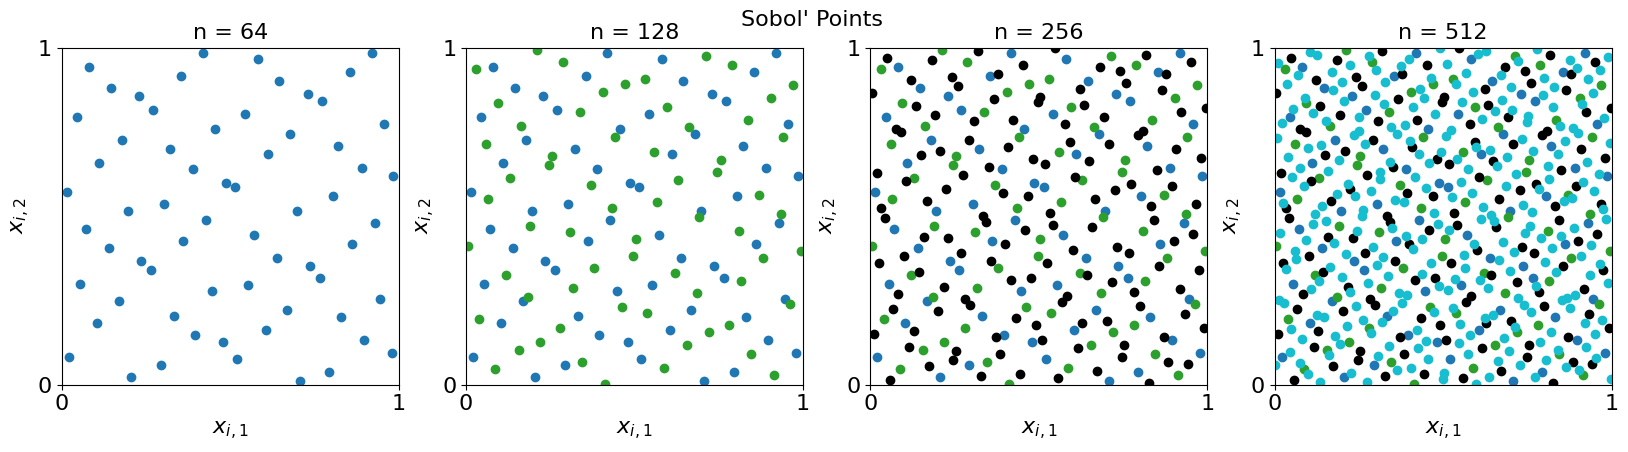

In [3]:
ld = qp.Sobol(d) #define the generator
xpts = ld.gen_samples(n) #generate points
print(xpts)
fig = plot_successive_points(ld,'Sobol\'',first_n=n,n_cols=4)
fig.savefig(figpath+'sobolpts.eps',format='eps')

### Compare to IID

Note that there are more gaps and clusters

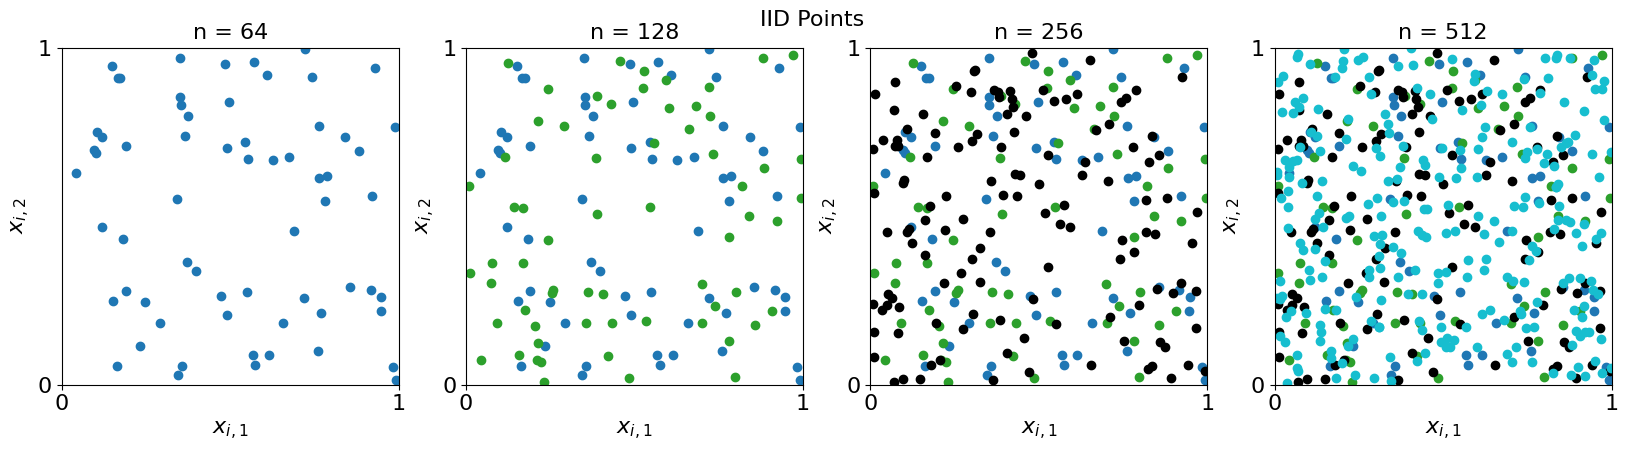

In [4]:
iid = qp.IIDStdUniform(d) #define the generator
fig = plot_successive_points(iid,'IID',first_n=n,n_cols=4)
fig.savefig(figpath+'iidpts.eps',format='eps')

## Beam Example Plots

### Plot IID and LD results for the beam example

[1037.1210731]


NameError: name 'n_tol' is not defined

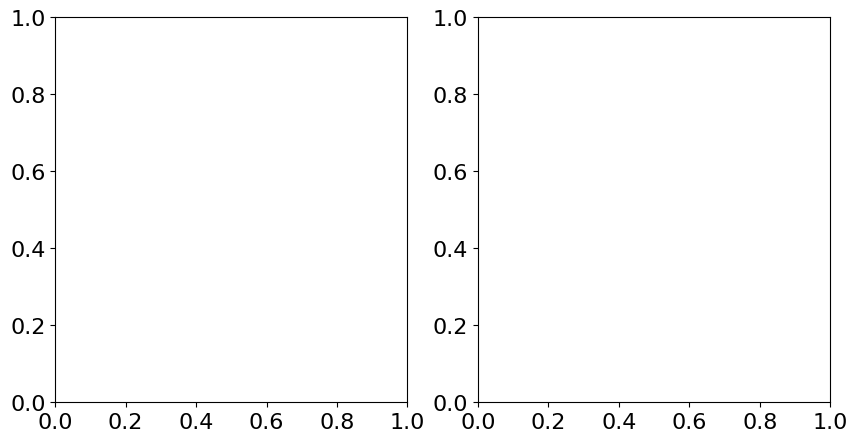

In [5]:
with open(figpath+'iid_ld.pkl','rb') as myfile: tol_vec,n_tol,ii_iid,ld_time,ld_n,iid_time,iid_n,best_solution_i = pickle.load(myfile)
print(best_solution_i)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].scatter(tol_vec[ii_iid:n_tol],iid_time[ii_iid:n_tol],color='tab:green'); 
ax[0].plot(tol_vec[ii_iid:n_tol],[(iid_time[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='tab:green')
ax[0].set_ylim([1,1e4]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[ii_iid:n_tol],iid_n[ii_iid:n_tol],color='tab:green'); 
ax[1].plot(tol_vec[ii_iid:n_tol],[(iid_n[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='tab:green')
ax[1].set_ylim([1e2,1e6]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([5,150]); 
  ax[ii].set_xticks([10,100])
  ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend(['IID',r'$\mathcal{O}(\varepsilon^{-2})$'],frameon=False)
  ax[ii].set_aspect(0.5)
fig.savefig(figpath+'iidbeam.eps',format='eps')

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].scatter(tol_vec[0:n_tol],ld_time[0:n_tol],color='tab:blue'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:blue')
ax[0].scatter(tol_vec[ii_iid:n_tol],iid_time[ii_iid:n_tol],color='tab:green'); 
ax[0].plot(tol_vec[ii_iid:n_tol],[(iid_time[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='tab:green')
ax[0].set_ylim([1,1e4]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[0:n_tol],ld_n[0:n_tol],color='tab:blue'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:blue')
ax[1].scatter(tol_vec[ii_iid:n_tol],iid_n[ii_iid:n_tol],color='tab:green'); 
ax[1].plot(tol_vec[ii_iid:n_tol],[(iid_n[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='tab:green')
ax[1].set_ylim([1e2,1e6]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([0.03,150]); ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xticks([0.1,1,10,100])
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend(['Lattice',r'$\mathcal{O}(\varepsilon^{-1})$','IID',r'$\mathcal{O}(\varepsilon^{-2})$'],frameon=False)
  ax[ii].set_aspect(0.8)
fig.savefig(figpath+'iidldbeam.eps',format='eps')

### Next, we compute the time required to solve for the deflection of the whole beam using low discrepancy with and without parallel

In [23]:
print(tol_vec)

[0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4]


In [26]:
tol_vec[-1]

102.4


Cantilever Beam



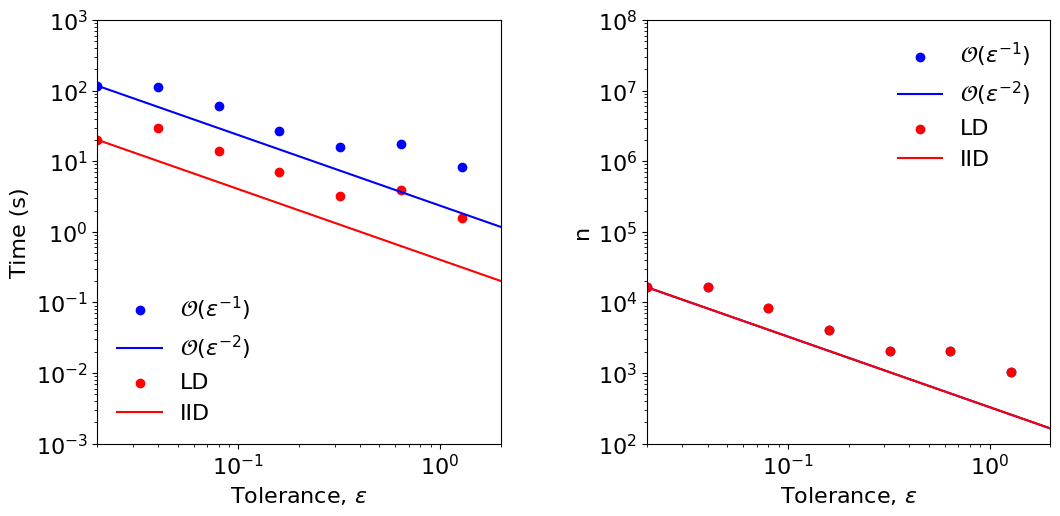

In [9]:
ld_integ = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=False) #integrand
ld_integ_p = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=8) #integrand with parallel processing

tol = 0.01
n_tol = 8  #number of different tolerances
tol_vec = [tol*(2**ii) for ii in range(n_tol)]  #initialize vector of tolerances
ld_time = [0]*n_tol; ld_n = [0]*n_tol  #low discrepancy time and number of function values
ld_p_time = [0]*n_tol; ld_p_n = [0]*n_tol  #low discrepancy time and number of function values with parallel
print(f'\nCantilever Beam\n')
print('iteration ', end = '')
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ, abs_tol = tol_vec[ii]).integrate()
  if ii == 0:
    best_solution = solution
  ld_time[ii] = data.time_integrate
  ld_n[ii] = data.n_total
  solution, data = qp.CubQMCLatticeG(ld_integ_p, abs_tol = tol_vec[ii]).integrate()
  ld_p_time[ii] = data.time_integrate
  ld_p_n[ii] = data.n_total
  print(ii, end = ' ')
print(best_solution)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,5.5))
ax[0].scatter(tol_vec[0:n_tol],ld_time[0:n_tol],color='tab:blue'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:blue')
ax[0].scatter(tol_vec[0:n_tol],ld_p_time[0:n_tol],color='tab:orange'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_p_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:orange')
ax[0].set_ylim([0.001,1000]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[0:n_tol],ld_n[0:n_tol],color='tab:blue'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:blue')
ax[1].scatter(tol_vec[0:n_tol],ld_p_n[0:n_tol],color='tab:orange'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_p_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:orange')
ax[1].set_ylim([1e2,1e8]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([tol,100*tol]); ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend(['Lattice',r'$\mathcal{O}(\varepsilon^{-1})$','Lattice Parallel',r'$\mathcal{O}(\varepsilon^{-1})$'],frameon=False)
  ax[ii].set_aspect(0.35)
fig.savefig(figpath+'ldparallelbeam.eps',format='eps')

In [10]:
!docker rm -f muqbp #shut down docker image

IOStream.flush timed out
IOStream.flush timed out
muqbp


In [11]:
assert False

AssertionError: 

## Below is long-running code, that we rarely wish to run

## Beam Example
### Set up the problem using a docker container to solve the ODE

In [4]:
import umbridge #this is the connector
!docker run --name muqbp -d -it -p 4243:4243 linusseelinger/benchmark-muq-beam-propagation:latest #get beam example
d = 3 #dimension of the randomness
lb = 1 #lower bound on randomness
ub = 1.2 #upper bound on randomness
umbridge_config = {"d": d}
model = umbridge.HTTPModel('http://localhost:4243','forward') #this is the original model
outindex = -1 #choose last element of the vector of beam deflections
modeli = deepcopy(model) #and construct a model for just that deflection
modeli.get_output_sizes = lambda *args : [1]
modeli.get_output_sizes()
modeli.__call__ = lambda *args,**kwargs: [[model.__call__(*args,**kwargs)[0][outindex]]]

26881ce4b4c62b5c4c601b93f349a19a05e66104305f23ed88f7e0cb1c3036cc


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

### First we compute the time required to solve for the deflection of the end point using IID and low discrepancy 

In [55]:
ld = qp.Uniform(qp.Lattice(d,seed=7),lower_bound=lb,upper_bound=ub) #lattice points for this problem
ld_integ = qp.UMBridgeWrapper(ld,modeli,umbridge_config,parallel=False) #integrand
iid = qp.Uniform(qp.IIDStdUniform(d),lower_bound=lb,upper_bound=ub)
iid_integ = qp.UMBridgeWrapper(iid,modeli,umbridge_config,parallel=False) #integrand
tol = 0.05  #smallest tolerance

n_tol = 12  #number of different tolerances
ii_iid = 7  #make this larger to reduce the time required by not running all cases for IID
tol_vec = [tol*(2**ii) for ii in range(n_tol)]  #initialize vector of tolerances
ld_time = [0]*n_tol; ld_n = [0]*n_tol  #low discrepancy time and number of function values
iid_time = [0]*n_tol; iid_n = [0]*n_tol  #IID time and number of function values
print(f'\nCantilever Beam\n')
print('iteration ', end = '')
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ, abs_tol = tol_vec[ii]).integrate()
  if ii == 0:
    best_solution_i = solution
  ld_time[ii] = data.time_integrate
  ld_n[ii] = data.n_total
  if ii >= ii_iid:
    solution, data = qp.CubMCG(iid_integ, abs_tol = tol_vec[ii]).integrate()
    iid_time[ii] = data.time_integrate
    iid_n[ii] = data.n_total
  print(ii, end = ' ')
with open(figpath+'iid_ld.pkl','wb') as myfile:pickle.dump([tol_vec,n_tol,ii_iid,ld_time,ld_n,iid_time,iid_n,best_solution_i],myfile)


Cantilever Beam

iteration 0 1 2 3 4 5 6 7 8 9 10 11 

### Next, we compute the time required to solve for the deflection of the whole beam using low discrepancy with and without parallel

In [23]:
print(tol_vec)

[0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4]


In [26]:
tol_vec[-1]

102.4


Cantilever Beam



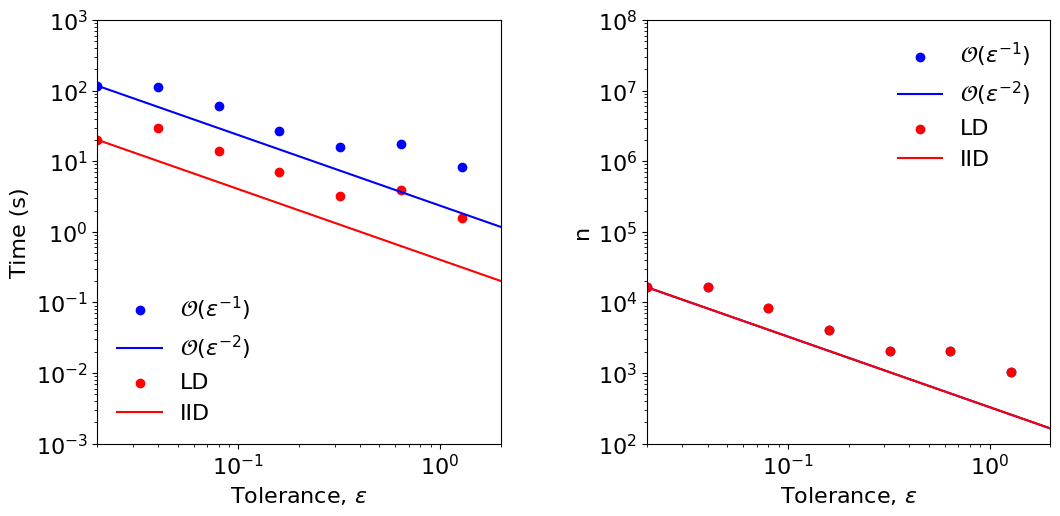

In [9]:
ld_integ = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=False) #integrand
ld_integ_p = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=8) #integrand with parallel processing

tol = 0.01
n_tol = 8  #number of different tolerances
tol_vec = [tol*(2**ii) for ii in range(n_tol)]  #initialize vector of tolerances
ld_time = [0]*n_tol; ld_n = [0]*n_tol  #low discrepancy time and number of function values
ld_p_time = [0]*n_tol; ld_p_n = [0]*n_tol  #low discrepancy time and number of function values with parallel
print(f'\nCantilever Beam\n')
print('iteration ', end = '')
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ, abs_tol = tol_vec[ii]).integrate()
  if ii == 0:
    best_solution = solution
  ld_time[ii] = data.time_integrate
  ld_n[ii] = data.n_total
  solution, data = qp.CubQMCLatticeG(ld_integ_p, abs_tol = tol_vec[ii]).integrate()
  ld_p_time[ii] = data.time_integrate
  ld_p_n[ii] = data.n_total
  print(ii, end = ' ')
print(best_solution)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,5.5))
ax[0].scatter(tol_vec[0:n_tol],ld_time[0:n_tol],color='tab:blue'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:blue')
ax[0].scatter(tol_vec[0:n_tol],ld_p_time[0:n_tol],color='tab:orange'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_p_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:orange')
ax[0].set_ylim([0.001,1000]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[0:n_tol],ld_n[0:n_tol],color='tab:blue'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:blue')
ax[1].scatter(tol_vec[0:n_tol],ld_p_n[0:n_tol],color='tab:orange'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_p_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='tab:orange')
ax[1].set_ylim([1e2,1e8]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([tol,100*tol]); ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend(['Lattice',r'$\mathcal{O}(\varepsilon^{-1})$','Lattice Parallel',r'$\mathcal{O}(\varepsilon^{-1})$'],frameon=False)
  ax[ii].set_aspect(0.35)
fig.savefig(figpath+'ldparallelbeam.eps',format='eps')

In [ ]:
sampler = qp.Uniform(qp.Lattice(d,seed=7),lower_bound=1,upper_bound=1.05) #lattice points for this problem
integrand = qp.UMBridgeWrapper(sampler,model,umbridge_config,parallel=False) #integrand
stop = qp.CubQMCLatticeG(integrand,abs_tol=1) #stoppng criterion
solution,data = stop.integrate()
data

In [ ]:
sampler = qp.Uniform(qp.IIDStdUniform(3,seed=7),lower_bound=1,upper_bound=1.05) #iid points for this problem
integrand = qp.UMBridgeWrapper(sampler,model,umbridge_config,parallel=False) # INTEGRAND
iid_mc_stop = qp.CubMCCLT(integrand,abs_tol=100) # QMC STOPPING CRITERION
#solution,data = iid_mc_stop.integrate()
data

In [ ]:
ld = qp.Sobol(d) #define the generator
xpts_Sobol = ld.gen_samples(n) #generate points
xpts
with open(figpath+'points_to_plot.pkl','wb') as myfile:pickle.dump([xpts,xpts_Sobol,d,n],myfile)
xpts = []
xpts_Sobol = []
print([xpts, xpts_Sobol])
with open(figpath+'points_to_plot.pkl','rb') as myfile: xpts,sob,_,_ = pickle.load(myfile)
print([xpts,sob])
fig = plot_successive_points(ld,'Sobol\'',first_n